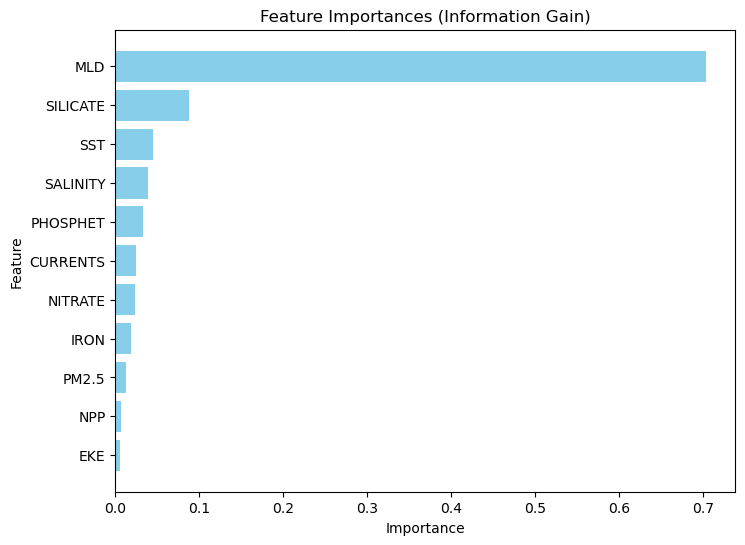

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Instantiate Decision Tree Regressor
decision_tree = DecisionTreeRegressor()

# Fit the model
decision_tree.fit(X, y)

# Get feature importances
importances = decision_tree.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Information Gain)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


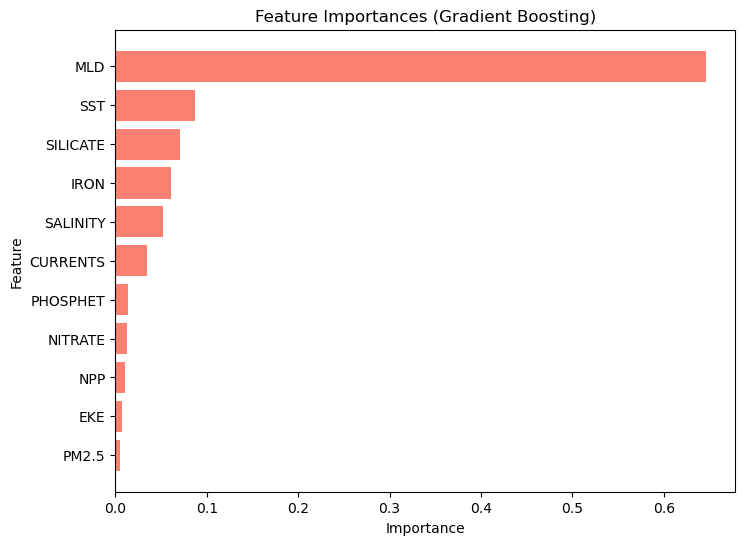

In [5]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Instantiate Gradient Boosting Regressor
gbm = GradientBoostingRegressor()

# Fit the model
gbm.fit(X, y)

# Get feature importances
importances = gbm.feature_importances_

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Gradient Boosting)')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


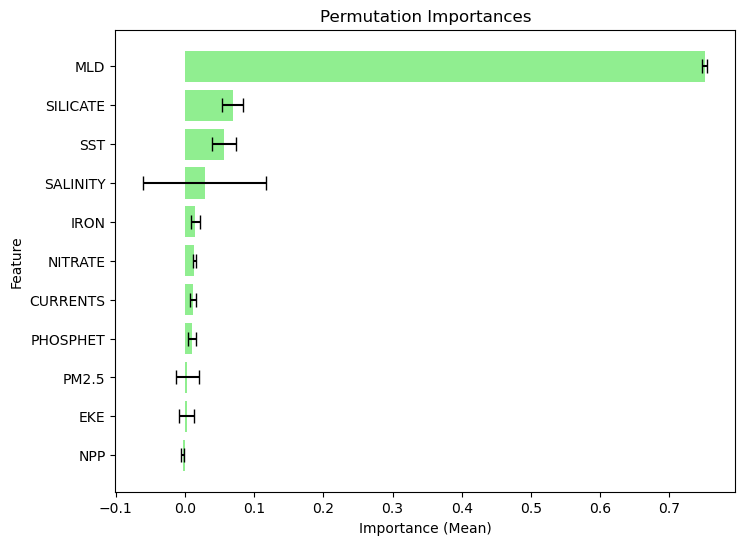

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Random Forest Regressor (or any other model)
rf = RandomForestRegressor(n_estimators=1000, random_state=200)
rf.fit(X_train, y_train)

# Calculate permutation importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Extract feature importances
importances_mean = perm_importance.importances_mean
importances_std = perm_importance.importances_std

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances_mean})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], xerr=importances_std, color='lightgreen', capsize=5)
plt.xlabel('Importance (Mean)')
plt.ylabel('Feature')
plt.title('Permutation Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


Epoch 1/50
6/6 [==============================] - 1s 28ms/step - loss: 61143.3477 - val_loss: 61209.9961
Epoch 2/50
6/6 [==============================] - 0s 6ms/step - loss: 60973.8008 - val_loss: 61036.1211
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 60803.7031 - val_loss: 60852.8281
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 60615.2227 - val_loss: 60650.5234
Epoch 5/50
6/6 [==============================] - 0s 9ms/step - loss: 60402.9844 - val_loss: 60418.3711
Epoch 6/50
6/6 [==============================] - 0s 8ms/step - loss: 60158.6211 - val_loss: 60144.6992
Epoch 7/50
6/6 [==============================] - 0s 6ms/step - loss: 59870.7344 - val_loss: 59821.9219
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 59532.3086 - val_loss: 59440.8984
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 59127.3867 - val_loss: 58990.0000
Epoch 10/50
6/6 [==============================] - 0s 6ms/step 

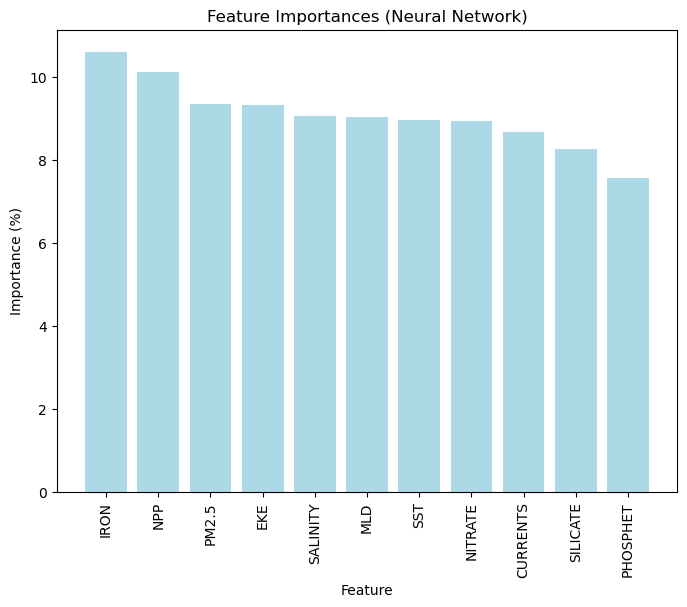

In [15]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Random Forest Regressor for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select top features based on importance scores
selected_features = X.columns[np.argsort(importances)[::-1]][:11]  # Select top 5 features, for example

# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
history = model.fit(X_train_selected_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test_selected_scaled, y_test)
print("Mean Squared Error:", mse)

# Get the weights of the first layer (assuming it's a Dense layer)
weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Normalize feature importances to percentage
total_importance = feature_importances.sum()
importances_percentage = (feature_importances / total_importance) * 100

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances_percentage})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='lightblue')
plt.ylabel('Importance (%)')
plt.xlabel('Feature')
plt.title('Feature Importances (Neural Network)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


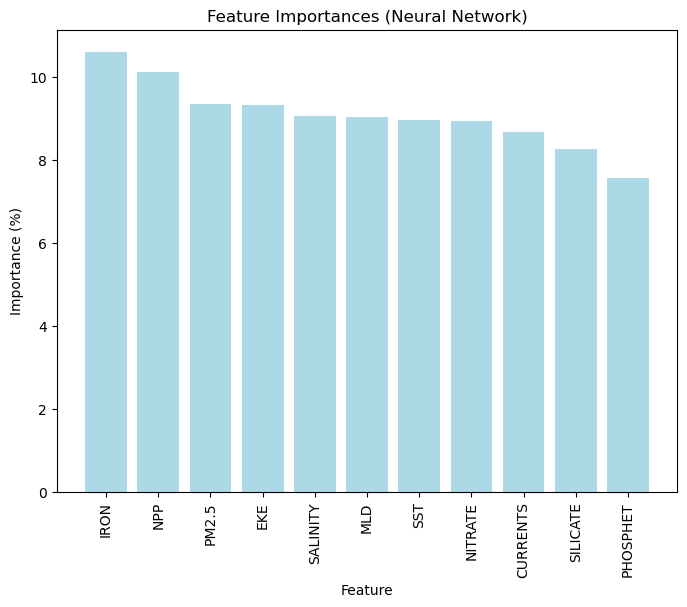

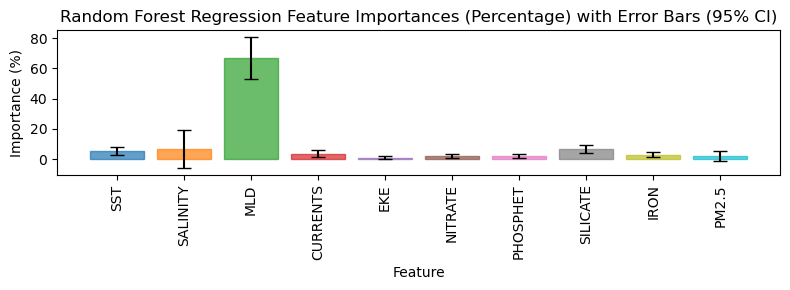

In [17]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import t

# Specify the file path to your CSV file
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'

# Read the CSV file into a DataFrame, parsing the 'DATE' column as dates
df = pd.read_csv(file_path, parse_dates=['DATE'])

# Select specific columns ('features') from the DataFrame
features = df[['SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]

# Normalize the features
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)

# Select the target variable column
target = df['DO']

# Instantiate the RandomForestRegressor with desired parameters
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the normalized features and target
random_forest.fit(features_normalized, target)

# Extract feature importances from multiple trees
importances = np.array([tree.feature_importances_ for tree in random_forest.estimators_])

# Calculate mean and standard deviation of importances
importances_mean = importances.mean(axis=0)
importances_std = importances.std(axis=0)

# Normalize importances to percentage
total_importance = importances_mean.sum()
importances_percentage = (importances_mean / total_importance) * 100
std_percentage = (importances_std / total_importance) * 100

# Calculate the critical value for 95% confidence interval
n = importances.shape[0]  # Number of trees
t_critical = t.ppf(0.975, n - 1)

# Calculate the margin of error
margin_error = t_critical * importances_std / np.sqrt(n)

# Calculate the confidence interval
lower_bound = importances_mean - margin_error
upper_bound = importances_mean + margin_error

# Define manual colors with transparency
colors = [(0.121, 0.466, 0.705, 0.7),  # Blue
          (1.0, 0.498, 0.054, 0.7),   # Orange
          (0.172, 0.627, 0.172, 0.7), # Green
          (0.839, 0.153, 0.157, 0.7), # Red
          (0.580, 0.403, 0.741, 0.7), # Purple
          (0.549, 0.337, 0.294, 0.7), # Brown
          (0.890, 0.466, 0.760, 0.7), # Pink
          (0.498, 0.498, 0.498, 0.7), # Gray
          (0.737, 0.741, 0.133, 0.7), # Olive
          (0.090, 0.745, 0.812, 0.7)] # Cyan

# Plot the feature importances as percentages with error bars
plt.figure(figsize=(8, 3))
plt.title("Random Forest Regression Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(features.columns, importances_percentage, yerr=std_percentage, capsize=5, edgecolor='black', linewidth=1)

# Set custom colors
for bar, color in zip(bars, colors):
    bar.set_color(color)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Epoch 1/50
6/6 [==============================] - 1s 26ms/step - loss: 61178.0156 - val_loss: 61217.6836
Epoch 2/50
6/6 [==============================] - 0s 11ms/step - loss: 61010.2227 - val_loss: 61034.8242
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 60837.6836 - val_loss: 60839.8086
Epoch 4/50
6/6 [==============================] - 0s 8ms/step - loss: 60649.7500 - val_loss: 60622.3984
Epoch 5/50
6/6 [==============================] - 0s 6ms/step - loss: 60436.8359 - val_loss: 60376.2734
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 60192.5508 - val_loss: 60094.0234
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 59910.5156 - val_loss: 59771.6602
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 59587.0000 - val_loss: 59398.7734
Epoch 9/50
6/6 [==============================] - 0s 8ms/step - loss: 59207.5508 - val_loss: 58970.4648
Epoch 10/50
6/6 [==============================] - 0s 6ms/step

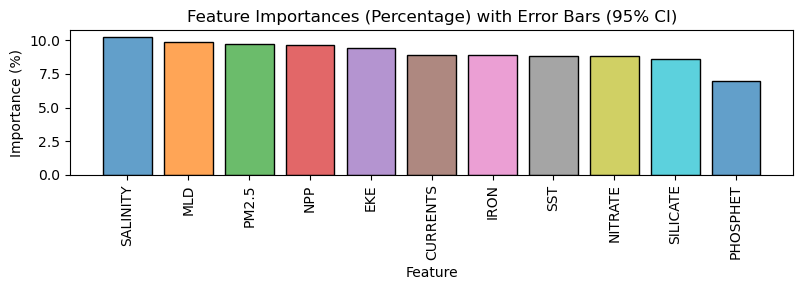

In [19]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Random Forest Regressor for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select top features based on importance scores
selected_features = X.columns[np.argsort(importances)[::-1]][:11]  # Select top 5 features, for example

# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
history = model.fit(X_train_selected_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test_selected_scaled, y_test)
print("Mean Squared Error:", mse)

# Get the weights of the first layer (assuming it's a Dense layer)
weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Normalize feature importances to percentage
total_importance = feature_importances.sum()
importances_percentage = (feature_importances / total_importance) * 100

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances_percentage})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Define manual colors with transparency
colors = [(0.121, 0.466, 0.705, 0.7),  # Blue
          (1.0, 0.498, 0.054, 0.7),   # Orange
          (0.172, 0.627, 0.172, 0.7), # Green
          (0.839, 0.153, 0.157, 0.7), # Red
          (0.580, 0.403, 0.741, 0.7), # Purple
          (0.549, 0.337, 0.294, 0.7), # Brown
          (0.890, 0.466, 0.760, 0.7), # Pink
          (0.498, 0.498, 0.498, 0.7), # Gray
          (0.737, 0.741, 0.133, 0.7), # Olive
          (0.090, 0.745, 0.812, 0.7)] # Cyan

# Plot the feature importances as percentages with error bars
plt.figure(figsize=(8, 3))
plt.title("Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Epoch 1/50
6/6 [==============================] - 1s 29ms/step - loss: 61022.2500 - val_loss: 61037.4258
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 60762.3711 - val_loss: 60787.6016
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 60496.3398 - val_loss: 60520.4336
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 60214.1484 - val_loss: 60233.0898
Epoch 5/50
6/6 [==============================] - 0s 8ms/step - loss: 59907.2969 - val_loss: 59914.5234
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 59566.9336 - val_loss: 59548.5898
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 59173.1719 - val_loss: 59133.0898
Epoch 8/50
6/6 [==============================] - 0s 9ms/step - loss: 58726.7891 - val_loss: 58660.9023
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 58223.8164 - val_loss: 58120.1211
Epoch 10/50
6/6 [==============================] - 0s 8ms/step 

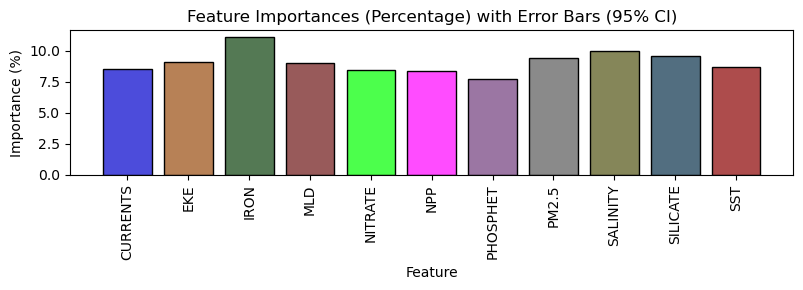

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Random Forest Regressor for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select top features based on importance scores
selected_features = X.columns[np.argsort(importances)[::-1]][:11]  # Select top 5 features, for example

# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
history = model.fit(X_train_selected_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test_selected_scaled, y_test)
print("Mean Squared Error:", mse)

# Get the weights of the first layer (assuming it's a Dense layer)
weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Normalize feature importances to percentage
total_importance = feature_importances.sum()
importances_percentage = (feature_importances / total_importance) * 100

# Create a DataFrame to visualize feature importances
importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': importances_percentage})
importance_df = importance_df.sort_values(by='Feature')

# Define manual colors with transparency
colors = [(0.000, 0.000, 0.804, 0.7),    # Medium Blue
          (0.600, 0.298, 0.054, 0.7),  # Deep Orange
          (0.043, 0.251, 0.043, 0.7),  # Deep Green
          (0.424, 0.078, 0.078, 0.7),  # Deep Red
          (0.000, 1.000, 0.000, 0.7),  # Lime
          (1.000, 0.000, 1.000, 0.7),  # Magenta
          (0.445, 0.235, 0.486, 0.7),  # Deep Pink
          (0.349, 0.349, 0.349, 0.7),  # Deep Gray
          (0.321, 0.325, 0.074, 0.7),  # Deep Olive
          (0.031, 0.188, 0.290, 0.7),  # Deep Blue
          (0.545, 0.000, 0.000, 0.7)]  # Dark Red


# Plot the feature importances as percentages with error bars
plt.figure(figsize=(8, 3))
plt.title("Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()





Epoch 1/50

6/6 [==============================] - 1s 40ms/step - loss: 61163.6602 - val_loss: 61128.7617
Epoch 2/50
6/6 [==============================] - 0s 8ms/step - loss: 60888.8164 - val_loss: 60854.0977
Epoch 3/50
6/6 [==============================] - 0s 6ms/step - loss: 60605.1016 - val_loss: 60560.7266
Epoch 4/50
6/6 [==============================] - 0s 6ms/step - loss: 60298.2852 - val_loss: 60239.2734
Epoch 5/50
6/6 [==============================] - 0s 4ms/step - loss: 59960.1406 - val_loss: 59880.2227
Epoch 6/50
6/6 [==============================] - 0s 6ms/step - loss: 59581.4102 - val_loss: 59473.2500
Epoch 7/50
6/6 [==============================] - 0s 8ms/step - loss: 59149.2266 - val_loss: 59008.1406
Epoch 8/50
6/6 [==============================] - 0s 6ms/step - loss: 58651.4492 - val_loss: 58472.7031
Epoch 9/50
6/6 [==============================] - 0s 6ms/step - loss: 58083.2969 - val_loss: 57861.5117
Epoch 10/50
6/6 [==============================] - 0s 4ms/s

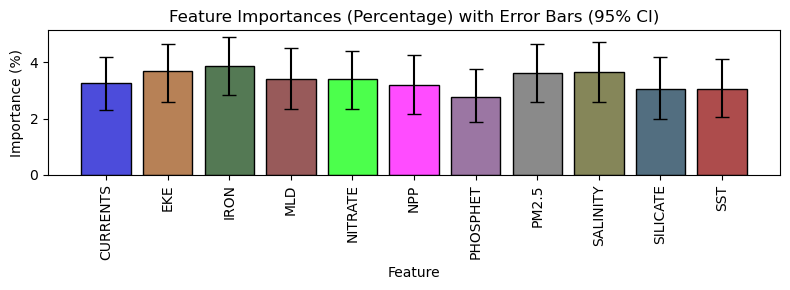

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Random Forest Regressor for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select top features based on importance scores
selected_features = X.columns[np.argsort(importances)[::-1]][:11]  # Select top 11 features

# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
history = model.fit(X_train_selected_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test_selected_scaled, y_test)
print("Mean Squared Error:", mse)

# Get the weights of the first layer (assuming it's a Dense layer)
weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Normalize feature importances to percentage
total_importance = feature_importances.sum()
importances_percentage = (feature_importances / total_importance) * 100

# Perform bootstrapping to estimate confidence intervals
num_bootstrap = 1000
bootstrap_indices = np.random.choice(range(weights.shape[1]), size=(num_bootstrap, X_train_selected_scaled.shape[1]))

# Initialize arrays to store bootstrapped importance values
bootstrap_importances = []

for indices in bootstrap_indices:
    # Calculate importance for each bootstrapped sample
    importance = np.abs(weights[:, indices]).sum(axis=1)
    bootstrap_importances.append(importance)

# Convert list of arrays to a single numpy array
bootstrap_importances = np.array(bootstrap_importances)

# Calculate mean importance and confidence intervals
mean_importance = bootstrap_importances.mean(axis=0)
ci_lower = np.percentile(bootstrap_importances, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_importances, 97.5, axis=0)

# Create a DataFrame to visualize feature importances with error bars
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': mean_importance,
    'CI_lower': ci_lower,
    'CI_upper': ci_upper
})

importance_df = importance_df.sort_values(by='Feature')

# Define manual colors with transparency
colors = [(0.000, 0.000, 0.804, 0.7),    # Medium Blue
          (0.600, 0.298, 0.054, 0.7),  # Deep Orange
          (0.043, 0.251, 0.043, 0.7),  # Deep Green
          (0.424, 0.078, 0.078, 0.7),  # Deep Red
          (0.000, 1.000, 0.000, 0.7),  # Lime
          (1.000, 0.000, 1.000, 0.7),  # Magenta
          (0.445, 0.235, 0.486, 0.7),  # Deep Pink
          (0.349, 0.349, 0.349, 0.7),  # Deep Gray
          (0.321, 0.325, 0.074, 0.7),  # Deep Olive
          (0.031, 0.188, 0.290, 0.7),  # Deep Blue
          (0.545, 0.000, 0.000, 0.7)]  # Dark Red

# Plot the feature importances as percentages with error bars
plt.figure(figsize=(8, 3))
plt.title("Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1, yerr=[importance_df['Importance'] - importance_df['CI_lower'], importance_df['CI_upper'] - importance_df['Importance']], capsize=5)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


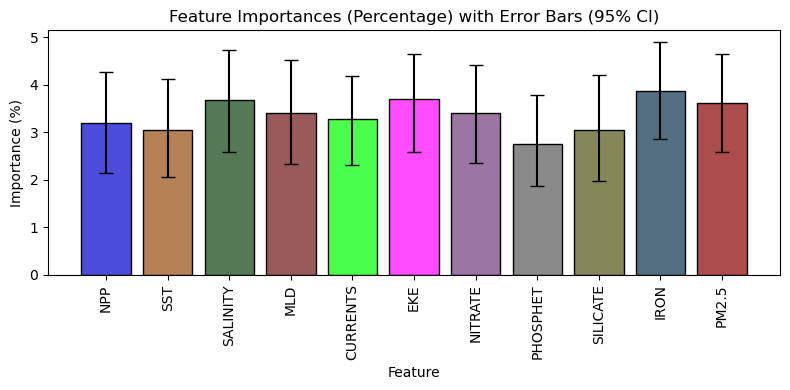

In [2]:
# Define the desired order
desired_order = ['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']

# Reorder the rows in the DataFrame according to the desired order
importance_df = importance_df.set_index('Feature').loc[desired_order].reset_index()

# Plot the feature importances as percentages with error bars
plt.figure(figsize=(8, 4))
plt.title("Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1, yerr=[importance_df['Importance'] - importance_df['CI_lower'], importance_df['CI_upper'] - importance_df['Importance']], capsize=5)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(r'H:\GLOBAL_OXYGEN\RF_MLR\plot_new\RF_advance.png', dpi=300)
plt.show()


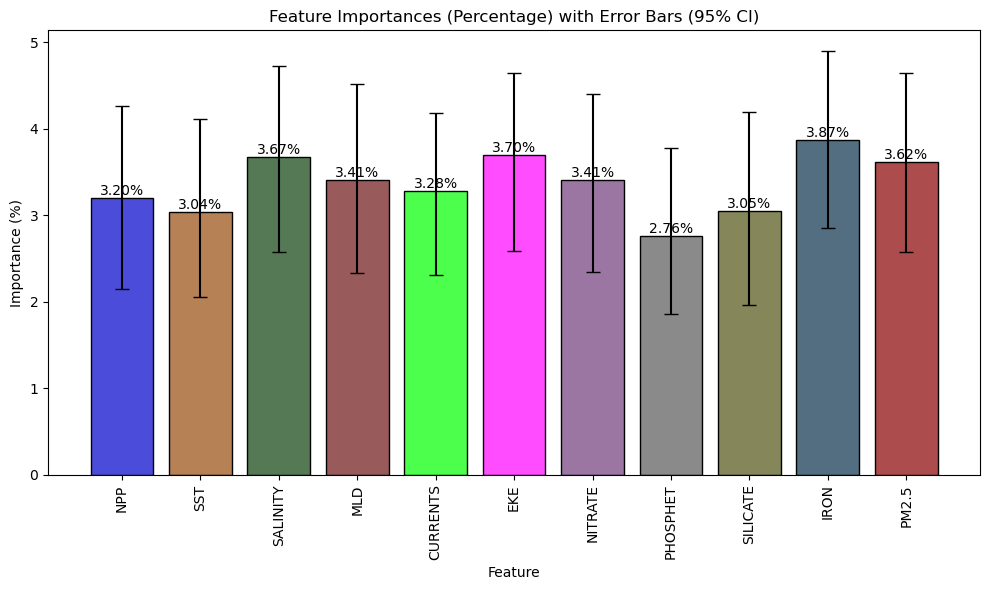

In [3]:
# Plot the feature importances as percentages with error bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1, yerr=[importance_df['Importance'] - importance_df['CI_lower'], importance_df['CI_upper'] - importance_df['Importance']], capsize=5)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)

# Label the bars with their corresponding values
for bar, importance in zip(bars, importance_df['Importance']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{importance:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


Epoch 1/1000
6/6 [==============================] - 1s 26ms/step - loss: 61024.8398 - val_loss: 61020.0898
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 60788.4609 - val_loss: 60785.6250
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 60554.2461 - val_loss: 60537.1758
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 60295.6406 - val_loss: 60263.1016
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 59996.7617 - val_loss: 59946.7344
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 59652.4375 - val_loss: 59575.3086
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 59246.6758 - val_loss: 59130.7773
Epoch 8/1000
6/6 [==============================] - 0s 8ms/step - loss: 58764.1367 - val_loss: 58600.8125
Epoch 9/1000
6/6 [==============================] - 0s 6ms/step - loss: 58199.2891 - val_loss: 57976.8398
Epoch 10/1000
6/6 [==========================

6/6 [==============================] - 0s 6ms/step - loss: 1668.1141 - val_loss: 1539.9878
Epoch 79/1000
6/6 [==============================] - 0s 4ms/step - loss: 1629.3372 - val_loss: 1512.4883
Epoch 80/1000
6/6 [==============================] - 0s 6ms/step - loss: 1594.3973 - val_loss: 1485.8652
Epoch 81/1000
6/6 [==============================] - 0s 6ms/step - loss: 1557.3579 - val_loss: 1466.6875
Epoch 82/1000
6/6 [==============================] - 0s 8ms/step - loss: 1524.3553 - val_loss: 1443.8546
Epoch 83/1000
6/6 [==============================] - 0s 9ms/step - loss: 1490.2047 - val_loss: 1423.5161
Epoch 84/1000
6/6 [==============================] - 0s 8ms/step - loss: 1455.3644 - val_loss: 1402.5648
Epoch 85/1000
6/6 [==============================] - 0s 6ms/step - loss: 1424.7600 - val_loss: 1381.7772
Epoch 86/1000
6/6 [==============================] - 0s 6ms/step - loss: 1397.1187 - val_loss: 1363.5316
Epoch 87/1000
6/6 [==============================] - 0s 4ms/step - lo

6/6 [==============================] - 0s 8ms/step - loss: 509.1910 - val_loss: 908.0699
Epoch 157/1000
6/6 [==============================] - 0s 9ms/step - loss: 503.2587 - val_loss: 907.8445
Epoch 158/1000
6/6 [==============================] - 0s 8ms/step - loss: 498.2510 - val_loss: 905.6891
Epoch 159/1000
6/6 [==============================] - 0s 6ms/step - loss: 493.2633 - val_loss: 902.1998
Epoch 160/1000
6/6 [==============================] - 0s 6ms/step - loss: 488.4980 - val_loss: 898.1560
Epoch 161/1000
6/6 [==============================] - 0s 4ms/step - loss: 483.4306 - val_loss: 892.1843
Epoch 162/1000
6/6 [==============================] - 0s 6ms/step - loss: 478.1414 - val_loss: 887.0572
Epoch 163/1000
6/6 [==============================] - 0s 6ms/step - loss: 473.5384 - val_loss: 880.3984
Epoch 164/1000
6/6 [==============================] - 0s 8ms/step - loss: 468.6100 - val_loss: 877.1882
Epoch 165/1000
6/6 [==============================] - 0s 9ms/step - loss: 463.9

Epoch 235/1000
6/6 [==============================] - 0s 6ms/step - loss: 258.6613 - val_loss: 642.5712
Epoch 236/1000
6/6 [==============================] - 0s 6ms/step - loss: 256.4475 - val_loss: 640.6598
Epoch 237/1000
6/6 [==============================] - 0s 8ms/step - loss: 254.9519 - val_loss: 638.0995
Epoch 238/1000
6/6 [==============================] - 0s 9ms/step - loss: 252.8926 - val_loss: 636.6873
Epoch 239/1000
6/6 [==============================] - 0s 8ms/step - loss: 250.9725 - val_loss: 635.0519
Epoch 240/1000
6/6 [==============================] - 0s 6ms/step - loss: 249.5425 - val_loss: 633.1786
Epoch 241/1000
6/6 [==============================] - 0s 9ms/step - loss: 247.9483 - val_loss: 631.5238
Epoch 242/1000
6/6 [==============================] - 0s 8ms/step - loss: 245.7585 - val_loss: 627.4659
Epoch 243/1000
6/6 [==============================] - 0s 6ms/step - loss: 244.2515 - val_loss: 622.2074
Epoch 244/1000
6/6 [==============================] - 0s 6ms/ste

Epoch 314/1000
6/6 [==============================] - 0s 6ms/step - loss: 155.6944 - val_loss: 484.6684
Epoch 315/1000
6/6 [==============================] - 0s 8ms/step - loss: 154.8099 - val_loss: 482.1913
Epoch 316/1000
6/6 [==============================] - 0s 6ms/step - loss: 153.8233 - val_loss: 477.1325
Epoch 317/1000
6/6 [==============================] - 0s 6ms/step - loss: 152.6317 - val_loss: 473.5635
Epoch 318/1000
6/6 [==============================] - 0s 8ms/step - loss: 151.8911 - val_loss: 471.2213
Epoch 319/1000
6/6 [==============================] - 0s 6ms/step - loss: 150.9196 - val_loss: 468.6510
Epoch 320/1000
6/6 [==============================] - 0s 6ms/step - loss: 150.6225 - val_loss: 465.2027
Epoch 321/1000
6/6 [==============================] - 0s 4ms/step - loss: 149.4719 - val_loss: 463.9228
Epoch 322/1000
6/6 [==============================] - 0s 6ms/step - loss: 148.3255 - val_loss: 461.8983
Epoch 323/1000
6/6 [==============================] - 0s 8ms/ste

Epoch 393/1000
6/6 [==============================] - 0s 8ms/step - loss: 101.1411 - val_loss: 378.8168
Epoch 394/1000
6/6 [==============================] - 0s 6ms/step - loss: 100.9926 - val_loss: 376.3922
Epoch 395/1000
6/6 [==============================] - 0s 9ms/step - loss: 100.5636 - val_loss: 377.3014
Epoch 396/1000
6/6 [==============================] - 0s 8ms/step - loss: 99.8513 - val_loss: 376.1449
Epoch 397/1000
6/6 [==============================] - 0s 6ms/step - loss: 99.3657 - val_loss: 373.4924
Epoch 398/1000
6/6 [==============================] - 0s 8ms/step - loss: 99.1874 - val_loss: 373.1065
Epoch 399/1000
6/6 [==============================] - 0s 6ms/step - loss: 98.4397 - val_loss: 369.2027
Epoch 400/1000
6/6 [==============================] - 0s 9ms/step - loss: 97.9746 - val_loss: 368.9546
Epoch 401/1000
6/6 [==============================] - 0s 8ms/step - loss: 97.7284 - val_loss: 368.5493
Epoch 402/1000
6/6 [==============================] - 0s 6ms/step - lo

6/6 [==============================] - 0s 6ms/step - loss: 68.5255 - val_loss: 298.2172
Epoch 473/1000
6/6 [==============================] - 0s 9ms/step - loss: 67.9664 - val_loss: 296.6371
Epoch 474/1000
6/6 [==============================] - 0s 8ms/step - loss: 67.7328 - val_loss: 294.7633
Epoch 475/1000
6/6 [==============================] - 0s 6ms/step - loss: 67.2310 - val_loss: 292.4006
Epoch 476/1000
6/6 [==============================] - 0s 6ms/step - loss: 67.1119 - val_loss: 291.0699
Epoch 477/1000
6/6 [==============================] - 0s 4ms/step - loss: 66.8932 - val_loss: 291.8039
Epoch 478/1000
6/6 [==============================] - 0s 9ms/step - loss: 66.7080 - val_loss: 291.6084
Epoch 479/1000
6/6 [==============================] - 0s 6ms/step - loss: 66.1482 - val_loss: 290.4204
Epoch 480/1000
6/6 [==============================] - 0s 6ms/step - loss: 66.2424 - val_loss: 288.8545
Epoch 481/1000
6/6 [==============================] - 0s 6ms/step - loss: 65.8087 - val_

6/6 [==============================] - 0s 9ms/step - loss: 47.7343 - val_loss: 252.9376
Epoch 552/1000
6/6 [==============================] - 0s 8ms/step - loss: 47.3194 - val_loss: 253.0427
Epoch 553/1000
6/6 [==============================] - 0s 6ms/step - loss: 47.1350 - val_loss: 252.7640
Epoch 554/1000
6/6 [==============================] - 0s 6ms/step - loss: 47.0550 - val_loss: 252.8919
Epoch 555/1000
6/6 [==============================] - 0s 8ms/step - loss: 46.7049 - val_loss: 254.7995
Epoch 556/1000
6/6 [==============================] - 0s 6ms/step - loss: 46.5095 - val_loss: 254.8152
Epoch 557/1000
6/6 [==============================] - 0s 6ms/step - loss: 46.3459 - val_loss: 251.0829
Epoch 558/1000
6/6 [==============================] - 0s 8ms/step - loss: 46.1199 - val_loss: 250.6134
Epoch 559/1000
6/6 [==============================] - 0s 6ms/step - loss: 45.8931 - val_loss: 246.6088
Epoch 560/1000
6/6 [==============================] - 0s 6ms/step - loss: 45.5973 - val_

6/6 [==============================] - 0s 6ms/step - loss: 32.4784 - val_loss: 213.4453
Epoch 631/1000
6/6 [==============================] - 0s 8ms/step - loss: 32.1191 - val_loss: 216.0012
Epoch 632/1000
6/6 [==============================] - 0s 6ms/step - loss: 31.8991 - val_loss: 215.2829
Epoch 633/1000
6/6 [==============================] - 0s 6ms/step - loss: 31.6510 - val_loss: 212.9567
Epoch 634/1000
6/6 [==============================] - 0s 8ms/step - loss: 31.6572 - val_loss: 211.8882
Epoch 635/1000
6/6 [==============================] - 0s 6ms/step - loss: 31.3013 - val_loss: 210.7332
Epoch 636/1000
6/6 [==============================] - 0s 9ms/step - loss: 31.2511 - val_loss: 210.8447
Epoch 637/1000
6/6 [==============================] - 0s 4ms/step - loss: 30.9922 - val_loss: 209.0007
Epoch 638/1000
6/6 [==============================] - 0s 6ms/step - loss: 31.3275 - val_loss: 210.7111
Epoch 639/1000
6/6 [==============================] - 0s 8ms/step - loss: 30.9294 - val_

6/6 [==============================] - 0s 6ms/step - loss: 22.5430 - val_loss: 179.5008
Epoch 710/1000
6/6 [==============================] - 0s 4ms/step - loss: 22.4571 - val_loss: 179.7109
Epoch 711/1000
6/6 [==============================] - 0s 6ms/step - loss: 22.1659 - val_loss: 180.4502
Epoch 712/1000
6/6 [==============================] - 0s 8ms/step - loss: 22.3955 - val_loss: 178.1340
Epoch 713/1000
6/6 [==============================] - 0s 6ms/step - loss: 22.1443 - val_loss: 177.8119
Epoch 714/1000
6/6 [==============================] - 0s 6ms/step - loss: 21.8866 - val_loss: 179.8536
Epoch 715/1000
6/6 [==============================] - 0s 4ms/step - loss: 22.1810 - val_loss: 181.5764
Epoch 716/1000
6/6 [==============================] - 0s 6ms/step - loss: 21.7263 - val_loss: 180.8766
Epoch 717/1000
6/6 [==============================] - 0s 6ms/step - loss: 21.3565 - val_loss: 177.9218
Epoch 718/1000
6/6 [==============================] - 0s 8ms/step - loss: 21.5003 - val_

6/6 [==============================] - 0s 8ms/step - loss: 15.2095 - val_loss: 154.8320
Epoch 789/1000
6/6 [==============================] - 0s 6ms/step - loss: 15.7309 - val_loss: 154.5196
Epoch 790/1000
6/6 [==============================] - 0s 8ms/step - loss: 15.2295 - val_loss: 154.3380
Epoch 791/1000
6/6 [==============================] - 0s 6ms/step - loss: 15.2873 - val_loss: 153.4787
Epoch 792/1000
6/6 [==============================] - 0s 6ms/step - loss: 15.1256 - val_loss: 154.1219
Epoch 793/1000
6/6 [==============================] - 0s 8ms/step - loss: 14.9992 - val_loss: 153.2894
Epoch 794/1000
6/6 [==============================] - 0s 6ms/step - loss: 14.9122 - val_loss: 155.3544
Epoch 795/1000
6/6 [==============================] - 0s 6ms/step - loss: 14.9623 - val_loss: 155.3974
Epoch 796/1000
6/6 [==============================] - 0s 4ms/step - loss: 15.0686 - val_loss: 154.0981
Epoch 797/1000
6/6 [==============================] - 0s 9ms/step - loss: 14.6184 - val_

6/6 [==============================] - 0s 6ms/step - loss: 10.8175 - val_loss: 137.8129
Epoch 868/1000
6/6 [==============================] - 0s 6ms/step - loss: 10.7538 - val_loss: 137.0133
Epoch 869/1000
6/6 [==============================] - 0s 8ms/step - loss: 10.8055 - val_loss: 138.1942
Epoch 870/1000
6/6 [==============================] - 0s 6ms/step - loss: 10.7295 - val_loss: 138.7363
Epoch 871/1000
6/6 [==============================] - 0s 6ms/step - loss: 10.7266 - val_loss: 138.1019
Epoch 872/1000
6/6 [==============================] - 0s 4ms/step - loss: 10.6074 - val_loss: 138.8394
Epoch 873/1000
6/6 [==============================] - 0s 6ms/step - loss: 10.5669 - val_loss: 138.7076
Epoch 874/1000
6/6 [==============================] - 0s 8ms/step - loss: 10.5919 - val_loss: 138.3551
Epoch 875/1000
6/6 [==============================] - 0s 6ms/step - loss: 10.5620 - val_loss: 138.2159
Epoch 876/1000
6/6 [==============================] - 0s 6ms/step - loss: 10.4562 - val_

6/6 [==============================] - 0s 6ms/step - loss: 7.9105 - val_loss: 129.1351
Epoch 948/1000
6/6 [==============================] - 0s 6ms/step - loss: 8.0899 - val_loss: 127.7836
Epoch 949/1000
6/6 [==============================] - 0s 8ms/step - loss: 7.7840 - val_loss: 126.2741
Epoch 950/1000
6/6 [==============================] - 0s 9ms/step - loss: 8.0673 - val_loss: 126.9620
Epoch 951/1000
6/6 [==============================] - 0s 8ms/step - loss: 7.9026 - val_loss: 128.2653
Epoch 952/1000
6/6 [==============================] - 0s 9ms/step - loss: 7.6991 - val_loss: 127.5711
Epoch 953/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.7344 - val_loss: 127.2941
Epoch 954/1000
6/6 [==============================] - 0s 8ms/step - loss: 7.7009 - val_loss: 126.4629
Epoch 955/1000
6/6 [==============================] - 0s 6ms/step - loss: 7.7106 - val_loss: 126.0083
Epoch 956/1000
6/6 [==============================] - 0s 8ms/step - loss: 7.5619 - val_loss: 125.

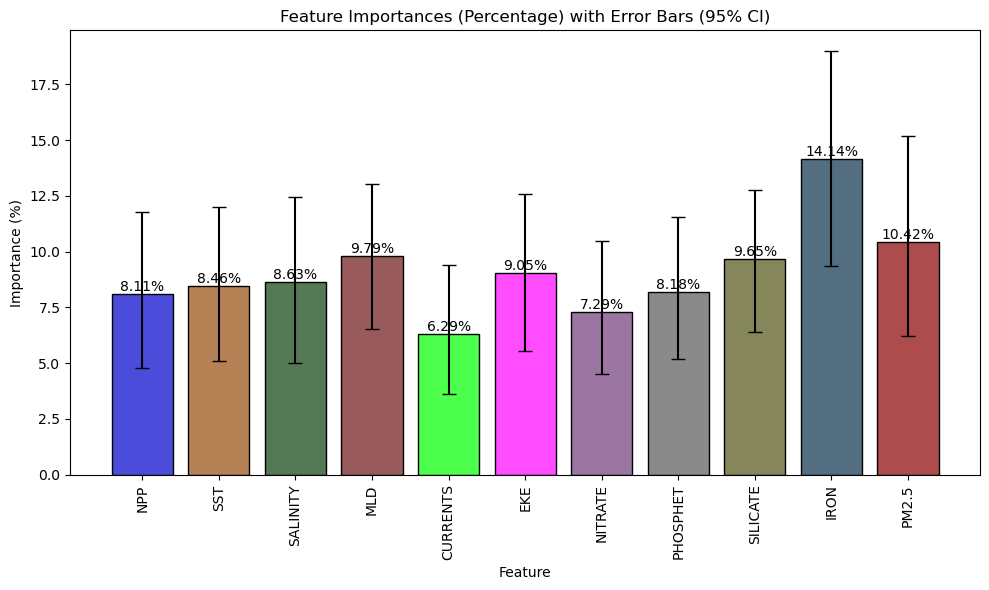

In [12]:
# Load your dataset
file_path = r'H:/GLOBAL_OXYGEN/RF_CONTRIBUTION/data_in_RF.csv'
df = pd.read_csv(file_path)

# Define features and target variable
X = df[['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']]
y = df['DO']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate Random Forest Regressor for feature selection
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the Random Forest model
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Select top features based on importance scores
selected_features = X.columns[np.argsort(importances)[::-1]][:11]  # Select top 11 features

# Subset the data with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Standardize features
scaler = StandardScaler()
X_train_selected_scaled = scaler.fit_transform(X_train_selected)
X_test_selected_scaled = scaler.transform(X_test_selected)

# Build a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_selected_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the neural network
history = model.fit(X_train_selected_scaled, y_train, epochs=1000, batch_size=32, validation_split=0.2)

# Evaluate the model
mse = model.evaluate(X_test_selected_scaled, y_test)
print("Mean Squared Error:", mse)

# Get the weights of the first layer (assuming it's a Dense layer)
weights = model.layers[0].get_weights()[0]

# Calculate the absolute sum of weights for each feature
feature_importances = np.abs(weights).sum(axis=1)

# Normalize feature importances to ensure sum is 100% and round the percentages
importances_percentage = np.round((feature_importances / feature_importances.sum()) * 100, 2)

# Perform bootstrapping to estimate confidence intervals
num_bootstrap = 1000
bootstrap_indices = np.random.choice(range(weights.shape[1]), size=(num_bootstrap, X_train_selected_scaled.shape[1]))

# Initialize arrays to store bootstrapped importance values
bootstrap_importances = []

for indices in bootstrap_indices:
    # Calculate importance for each bootstrapped sample
    importance = np.abs(weights[:, indices]).sum(axis=1)
    bootstrap_importances.append(importance)

# Convert list of arrays to a single numpy array
bootstrap_importances = np.array(bootstrap_importances)

# Calculate mean importance and confidence intervals
mean_importance = bootstrap_importances.mean(axis=0)
ci_lower = np.percentile(bootstrap_importances, 2.5, axis=0)
ci_upper = np.percentile(bootstrap_importances, 97.5, axis=0)

# Normalize mean importance to ensure sum is 100% and round the percentages
mean_importance_percentage = np.round((mean_importance / mean_importance.sum()) * 100, 2)

# Normalize confidence intervals to ensure sum is 100% and round the percentages
ci_lower_percentage = np.round((ci_lower / mean_importance.sum()) * 100, 2)
ci_upper_percentage = np.round((ci_upper / mean_importance.sum()) * 100, 2)

# Create a DataFrame to visualize feature importances with error bars
importance_df = pd.DataFrame({
    'Feature': selected_features,
    'Importance': mean_importance_percentage,
    'CI_lower': ci_lower_percentage,
    'CI_upper': ci_upper_percentage
})


# Define the desired order
desired_order = ['NPP', 'SST', 'SALINITY', 'MLD', 'CURRENTS', 'EKE', 'NITRATE', 'PHOSPHET', 'SILICATE', 'IRON', 'PM2.5']

# Reorder the rows in the DataFrame according to the desired order
importance_df = importance_df.set_index('Feature').loc[desired_order].reset_index()

# Plot the feature importances as percentages with error bars
plt.figure(figsize=(10, 6))
plt.title("Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1, yerr=[importance_df['Importance'] - importance_df['CI_lower'], importance_df['CI_upper'] - importance_df['Importance']], capsize=5)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)

# Label the bars with their corresponding values
for bar, importance in zip(bars, importance_df['Importance']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{importance:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()


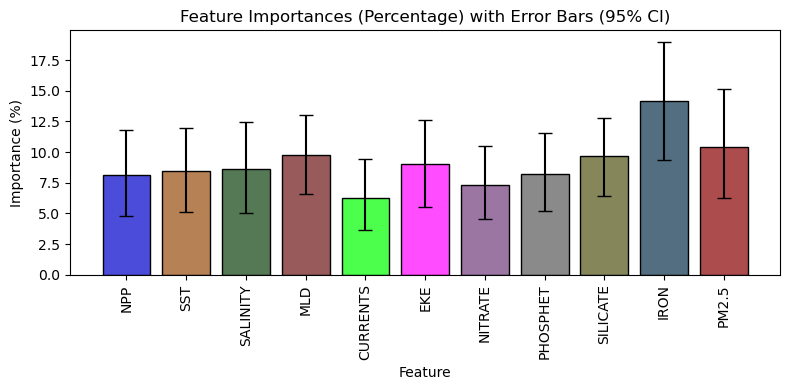

In [13]:
# Plot the feature importances as percentages with error bars
plt.figure(figsize=(8, 4))
plt.title("Feature Importances (Percentage) with Error Bars (95% CI)")
bars = plt.bar(importance_df['Feature'], importance_df['Importance'], color=colors, edgecolor='black', linewidth=1, yerr=[importance_df['Importance'] - importance_df['CI_lower'], importance_df['CI_upper'] - importance_df['Importance']], capsize=5)

plt.xlabel("Feature")
plt.ylabel("Importance (%)")
plt.xticks(rotation=90)

plt.tight_layout()
plt.savefig(r'H:\GLOBAL_OXYGEN\RF_MLR\plot_new\RF_advance_100_percentage.png', dpi=300)
plt.show()
